In [1]:
import sys
import os
from glob import glob
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

sys.path.append("../Import")
from definitions import crop_list2

root_path = "../"
data_path = f"{root_path}data/"

In [11]:
class EDA:
    import numpy as np
    import pandas as pd

    def print_title(body, br=2, bp="┌▣ ", hr=" ---- ---- ---- ----"):

        """
        body : 내용
        bp : bullet point, 글머리 기호
        hr : Horizontal Rule, 수평선
        """

        class ff:
            PURPLE = "\033[95m"
            CYAN = "\033[96m"
            DARKCYAN = "\033[36m"
            BLUE = "\033[94m"
            GREEN = "\033[92m"
            YELLOW = "\033[93m"
            RED = "\033[91m"
            BOLD = "\033[1m"
            UNDERLINE = "\033[4m"
            END = "\033[0m"

        print("\n" * br + ff.BOLD + bp + ff.UNDERLINE + body + ff.END + hr)

    def Check(df) -> pd.DataFrame:

        EDA.print_title("""df.shape""")
        print(df.shape)

        EDA.print_title("""df.info()""")
        print(df.info())

        EDA.print_title("""df.head()""")
        display(df.head())

    def uv(df) -> None:

        EDA.print_title("""df.describe().T""")
        display(df.describe().T)

        EDA.print_title("""df.describe(include=['O'])""")
        display(df.describe(include=["O"]))

        df_temp = df.isna()
        EDA.print_title("""df.isna().sum()""")
        display(df_temp.sum().to_frame())

        EDA.print_title("""sns.heatmap(data=df.isna())""")
        sns.heatmap(data=df_temp)
        plt.show()

        EDA.print_title("df.isna().mean()")
        display(df_temp.mean().to_frame())

    def mv(df):

        df_corr = df.corr()
        EDA.print_title("""df.corr()""")
        display(df_corr)
        EDA.print_title("""sns.heatmap(data=df.corr(), annot=True, fmt=".2f")""")
        display(sns.heatmap(data=df_corr, annot=True, fmt=".2f"))

# 도매

In [3]:
# 경로 자신에게 맞게 확인
df_raw = pd.read_csv("../Data/AgriMarket.csv")
EDA.Check(df_raw)



┌▣ df.shape ---- ---- ---- ----
(15880, 11)


┌▣ df.info() ---- ---- ---- ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15880 entries, 0 to 15879
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YMD               15880 non-null  int64  
 1   YM                15880 non-null  int64  
 2   MD                15880 non-null  int64  
 3   Product           15880 non-null  object 
 4   Price             15880 non-null  float64
 5   환율(원/US$)         15880 non-null  float64
 6   콜금리(연%)           15880 non-null  float64
 7   item_PPI          11910 non-null  float64
 8   item_CPI          15880 non-null  float64
 9   Food Price Index  15880 non-null  float64
 10  Cereals           15880 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 1.3+ MB
None


┌▣ df.head() ---- ---- ---- ----


,YMD,YM,MD,Product,Price,환율(원/US$),콜금리(연%),item_PPI,item_CPI,Food Price Index,Cereals
0,20050103,200501,103,감자,6323.101,1013.000,3.330,71.150,69.162,65.400,60.500
1,20050103,200501,103,고구마,4291.111,1013.000,3.330,53.120,41.811,65.400,60.500
2,20050103,200501,103,깻잎,4534.333,1013.000,3.330,NaN,53.348,65.400,60.500
3,20050103,200501,103,마늘,20785.714,1013.000,3.330,49.580,58.270,65.400,60.500
4,20050104,200501,104,감자,6233.314,1013.000,3.330,71.150,69.162,65.400,60.500




┌▣ df.describe().T ---- ---- ---- ----


,count,mean,std,min,25%,50%,75%,max
YMD,15880.000,20125225.353,46172.303,20050103.000,20081217.000,20121166.500,20161215.000,20201231.000
YM,15880.000,201252.093,461.723,200501.000,200812.000,201211.500,201612.000,202012.000
MD,15880.000,668.678,344.309,102.000,402.000,703.000,1001.000,1231.000
Price,15880.000,13903.522,16178.767,2193.026,4509.877,6981.021,14251.275,73375.000
환율(원/US$),15880.000,1108.048,88.882,929.600,1055.300,1138.900,1167.600,1257.500
콜금리(연%),15880.000,2.528,1.214,0.700,1.590,2.340,3.330,4.780
item_PPI,11910.000,88.872,35.456,29.870,62.670,84.150,110.385,353.360
item_CPI,15880.000,78.725,24.509,35.908,59.595,73.189,94.780,212.401
Food Price Index,15880.000,100.666,18.324,65.400,91.100,97.000,118.200,137.600
Cereals,15880.000,104.581,24.778,59.400,90.500,98.700,124.400,163.300




┌▣ df.describe(include=['O']) ---- ---- ---- ----


,Product
count,15880
unique,4
top,감자
freq,3970




┌▣ df.isna().sum() ---- ---- ---- ----


,0
YMD,0
YM,0
MD,0
Product,0
Price,0
환율(원/US$),0
콜금리(연%),0
item_PPI,3970
item_CPI,0
Food Price Index,0




┌▣ sns.heatmap(data=df.isna()) ---- ---- ---- ----


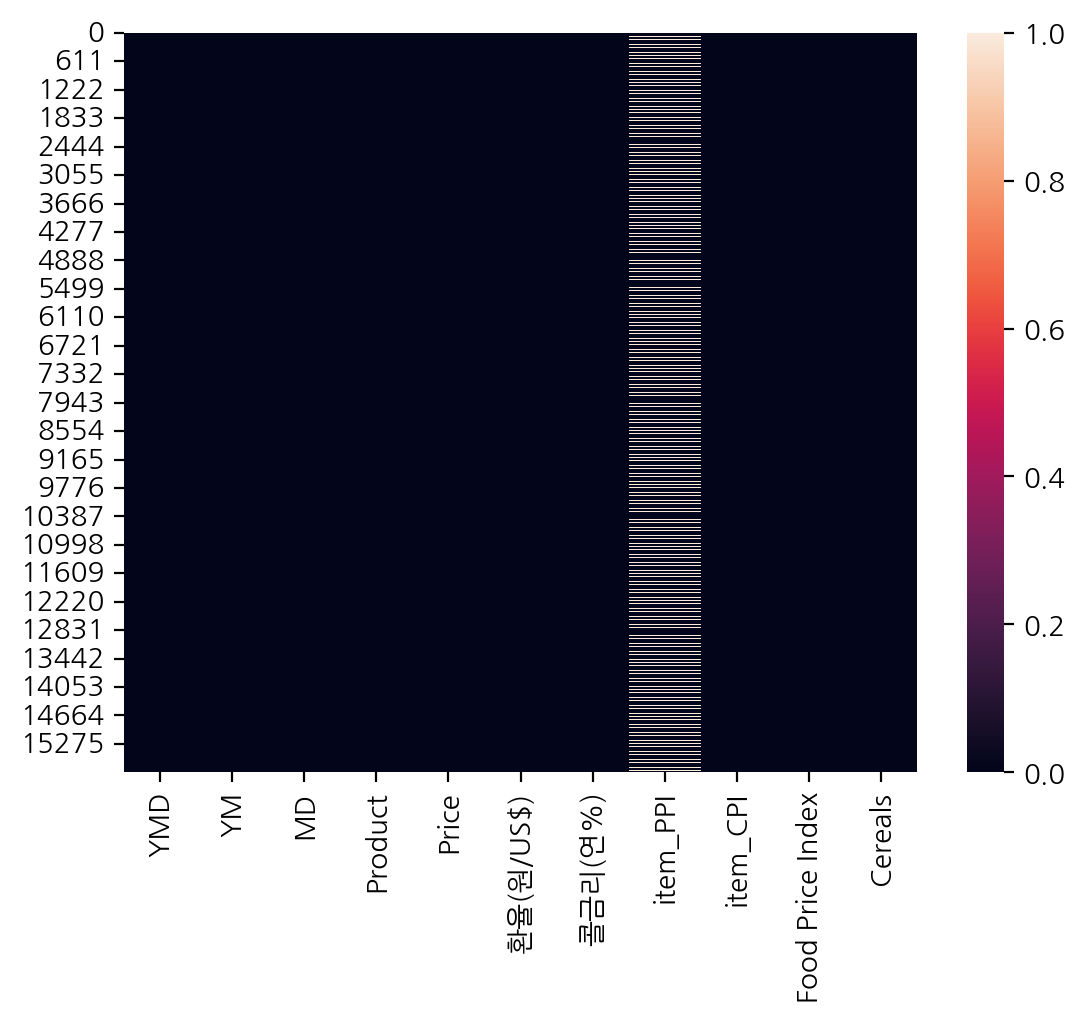



┌▣ df.isna().mean() ---- ---- ---- ----


,0
YMD,0.000
YM,0.000
MD,0.000
Product,0.000
Price,0.000
환율(원/US$),0.000
콜금리(연%),0.000
item_PPI,0.250
item_CPI,0.000
Food Price Index,0.000


In [12]:
EDA.uv(df_raw)



┌▣ df.corr() ---- ---- ---- ----


,YMD,YM,MD,Price,환율(원/US$),콜금리(연%),item_PPI,item_CPI,Food Price Index,Cereals
YMD,1.000,1.000,0.003,0.202,0.464,-0.837,0.587,0.641,0.186,0.103
YM,1.000,1.000,0.003,0.202,0.464,-0.837,0.587,0.641,0.186,0.103
MD,0.003,0.003,1.000,-0.039,0.006,-0.001,-0.085,-0.139,0.032,0.007
Price,0.202,0.202,-0.039,1.000,0.109,-0.191,0.285,0.550,0.071,0.044
환율(원/US$),0.464,0.464,0.006,0.109,1.000,-0.451,0.264,0.284,0.355,0.351
콜금리(연%),-0.837,-0.837,-0.001,-0.191,-0.451,1.000,-0.522,-0.523,0.040,0.149
item_PPI,0.587,0.587,-0.085,0.285,0.264,-0.522,1.000,0.797,0.164,0.121
item_CPI,0.641,0.641,-0.139,0.550,0.284,-0.523,0.797,1.000,0.225,0.179
Food Price Index,0.186,0.186,0.032,0.071,0.355,0.040,0.164,0.225,1.000,0.959
Cereals,0.103,0.103,0.007,0.044,0.351,0.149,0.121,0.179,0.959,1.000




┌▣ sns.heatmap(data=df.corr(), annot=True, fmt=".2f") ---- ---- ---- ----


<AxesSubplot: >

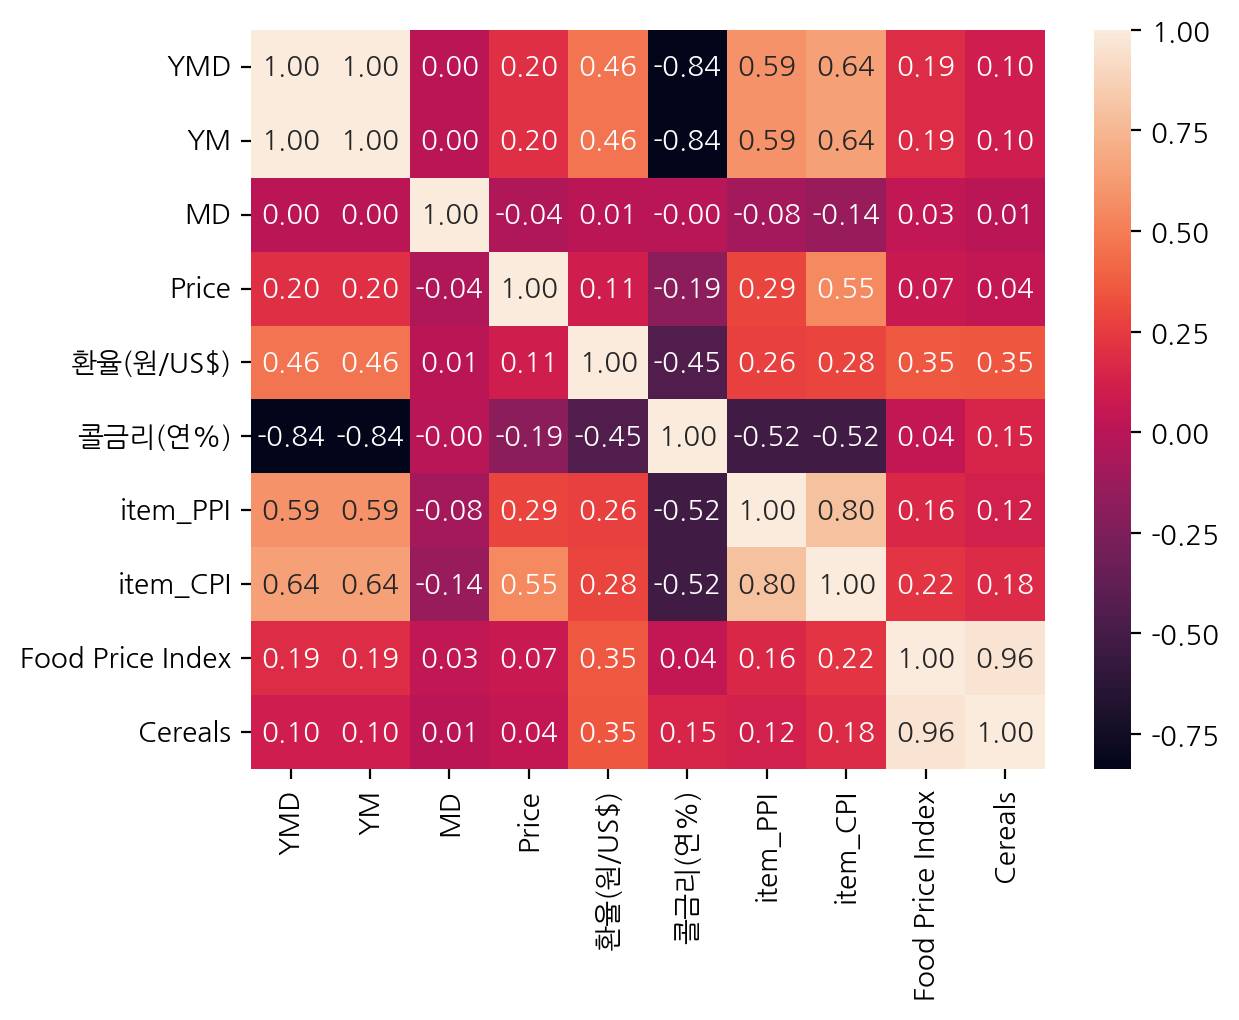

In [4]:
EDA.mv(df_raw)

In [19]:
df_raw

,YMD,YM,MD,Product,Price,환율(원/US$),콜금리(연%),item_PPI,item_CPI,Food Price Index,Cereals
0,20050103,200501,103,감자,6323.101,1013.000,3.330,71.150,69.162,65.400,60.500
1,20050103,200501,103,고구마,4291.111,1013.000,3.330,53.120,41.811,65.400,60.500
2,20050103,200501,103,깻잎,4534.333,1013.000,3.330,NaN,53.348,65.400,60.500
3,20050103,200501,103,마늘,20785.714,1013.000,3.330,49.580,58.270,65.400,60.500
4,20050104,200501,104,감자,6233.314,1013.000,3.330,71.150,69.162,65.400,60.500
...,...,...,...,...,...,...,...,...,...,...,...
15875,20201230,202012,1230,마늘,53533.333,1180.050,0.700,102.040,118.170,108.600,116.400
15876,20201231,202012,1231,감자,5094.164,1180.050,0.700,107.240,102.430,108.600,116.400
15877,20201231,202012,1231,고구마,10700.294,1180.050,0.700,137.900,96.130,108.600,116.400
15878,20201231,202012,1231,깻잎,7598.167,1180.050,0.700,NaN,87.660,108.600,116.400


0


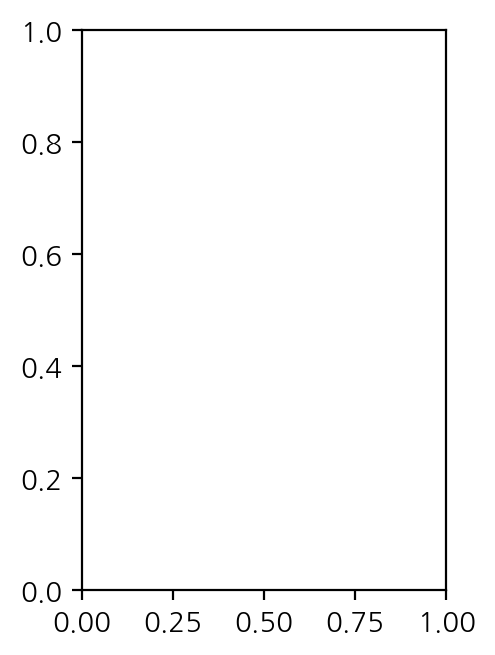

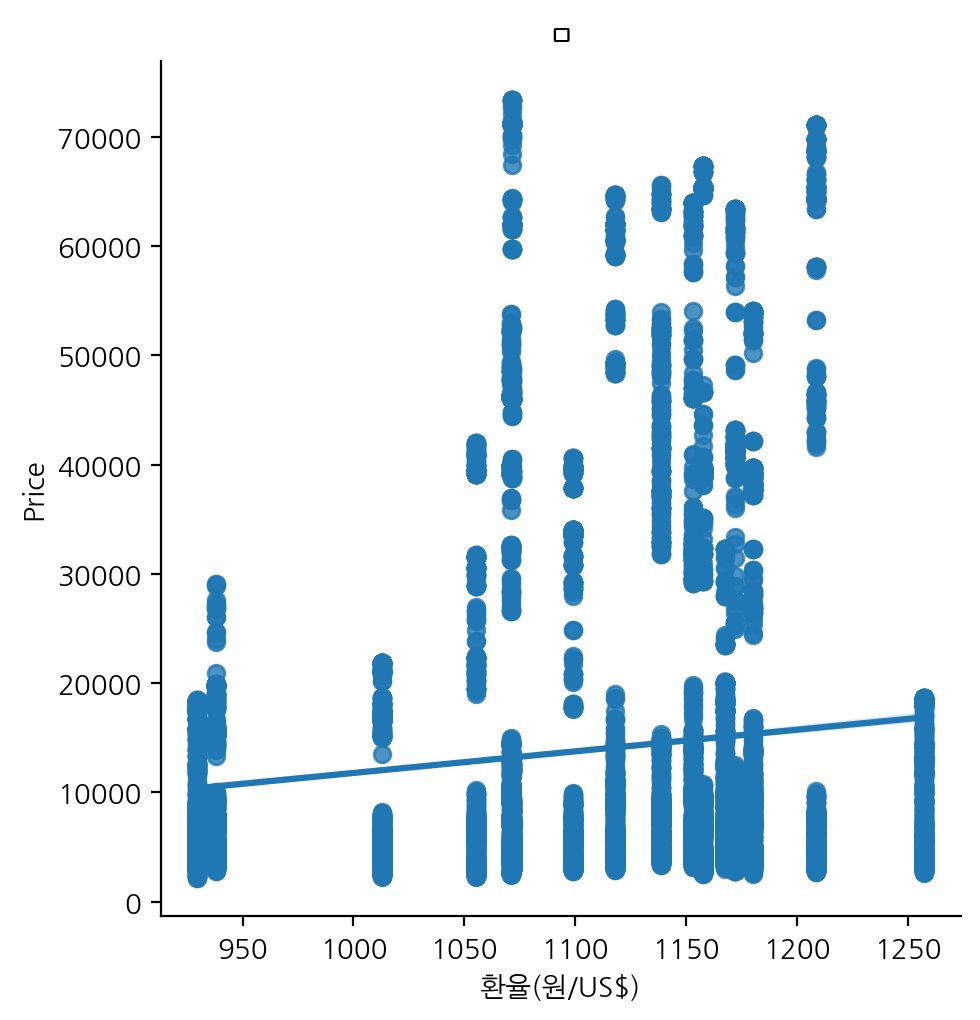

1


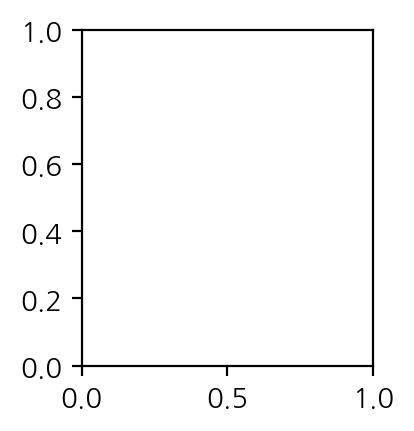

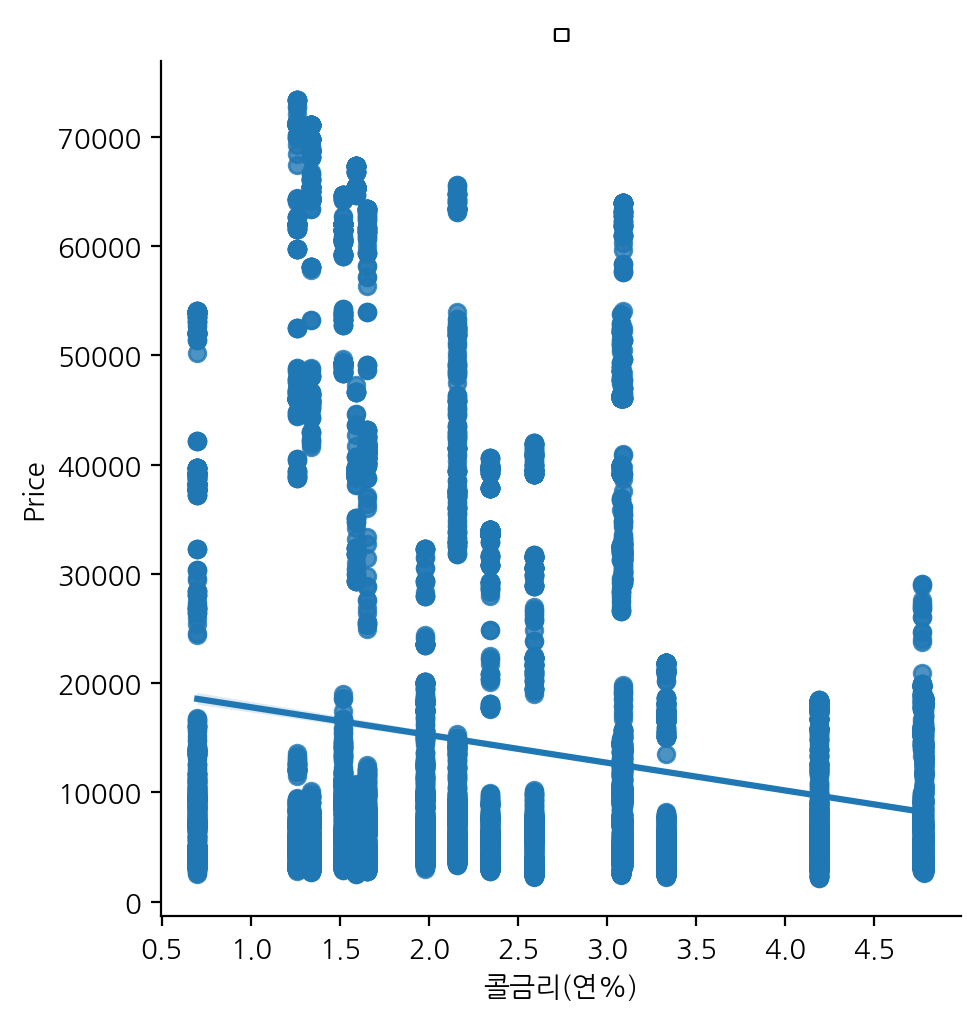

2


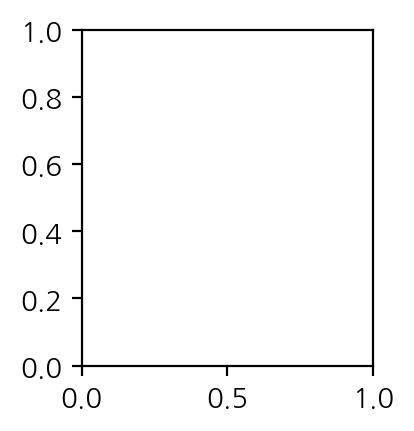

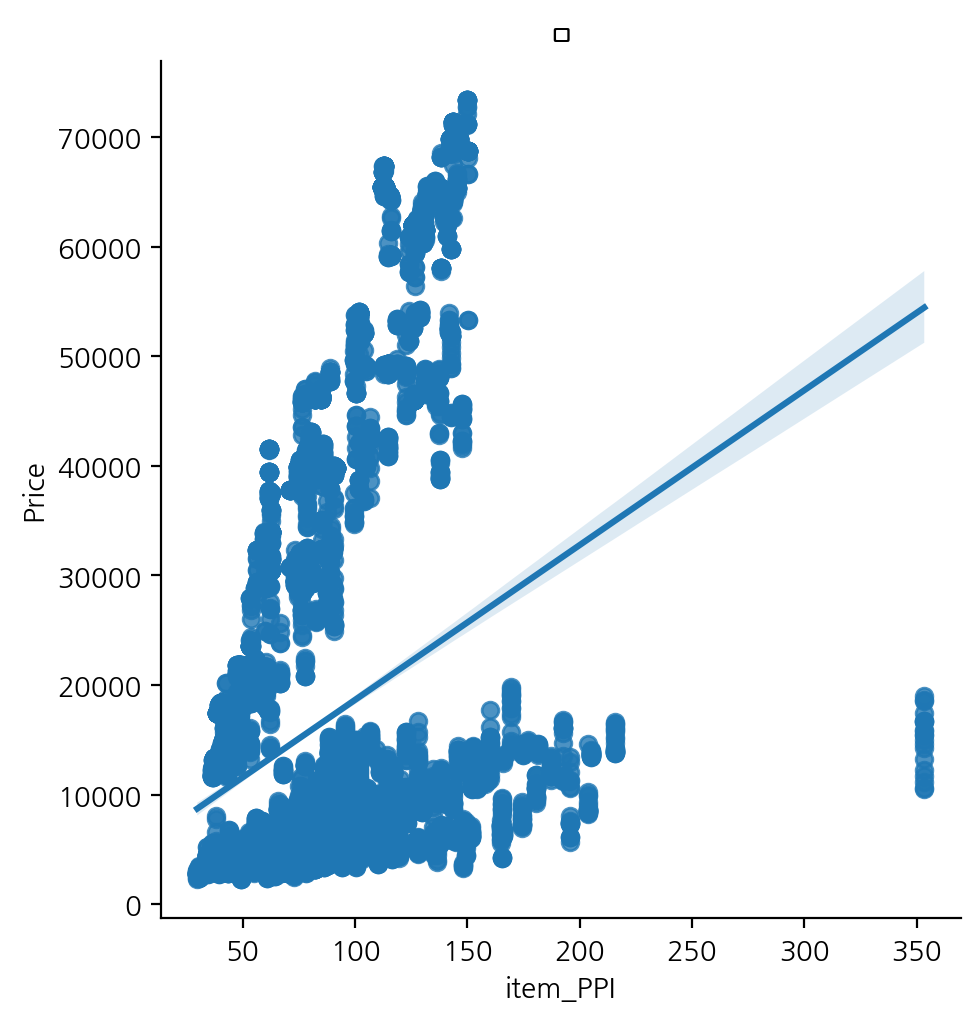

3


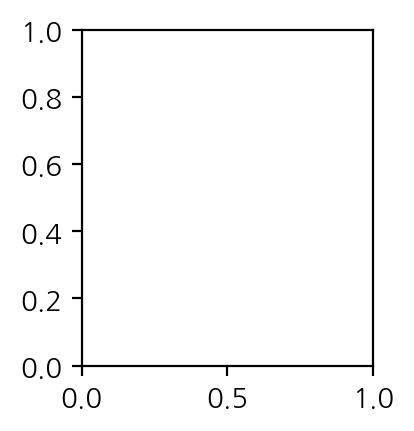

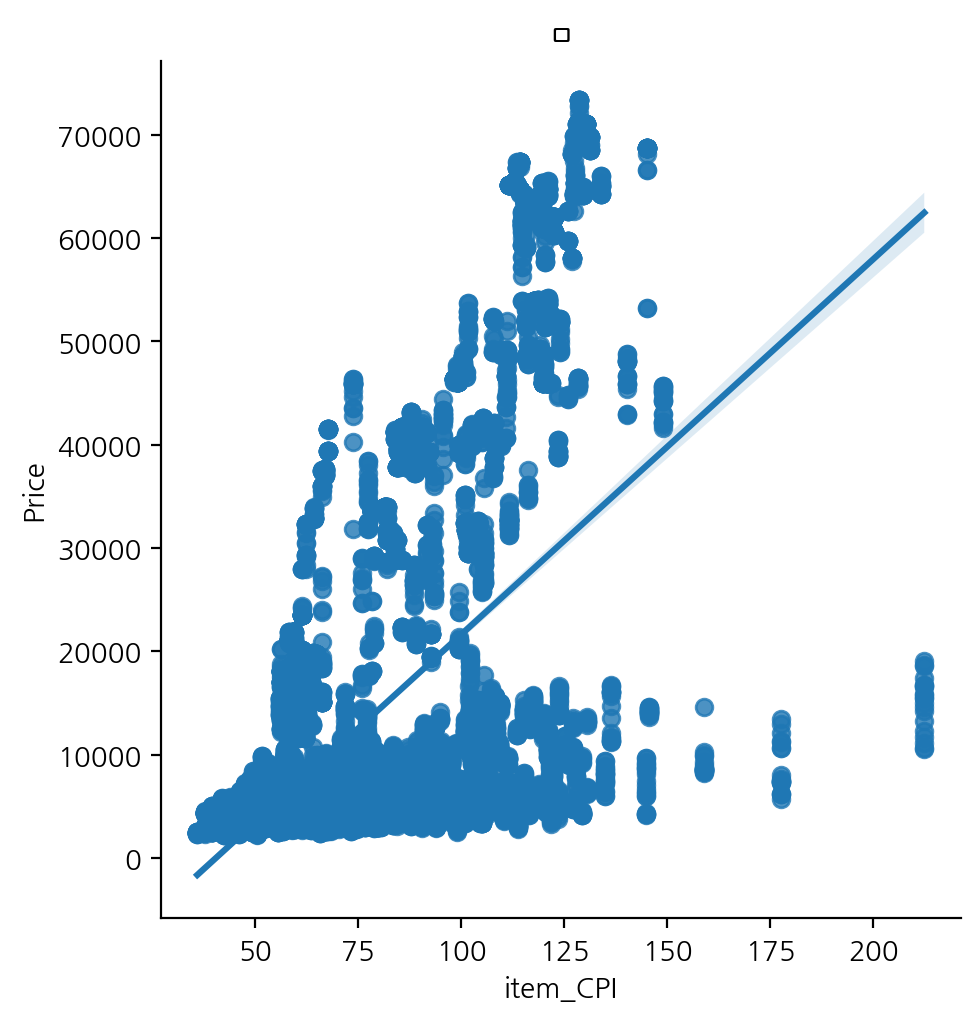

4


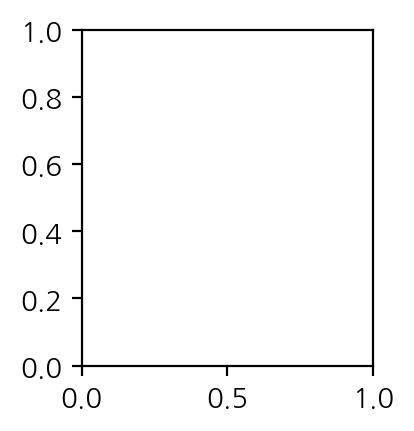

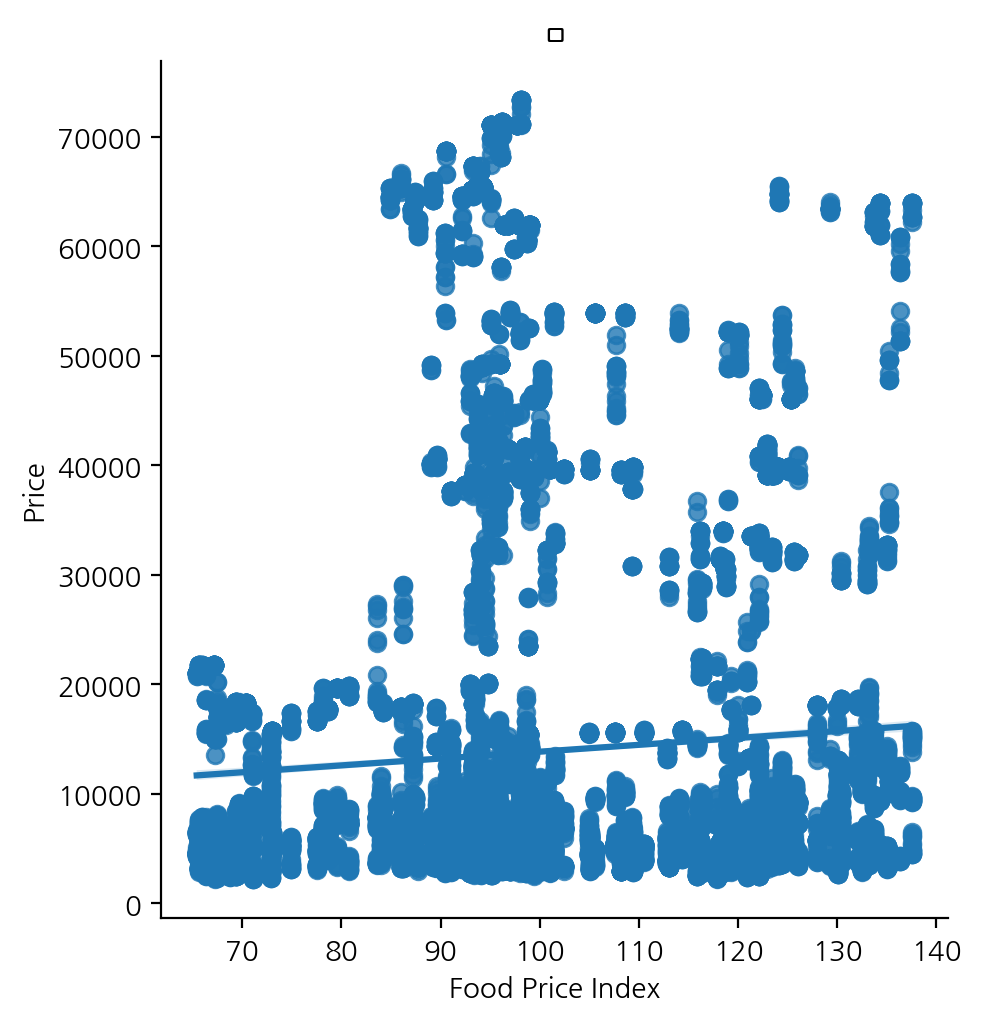

5


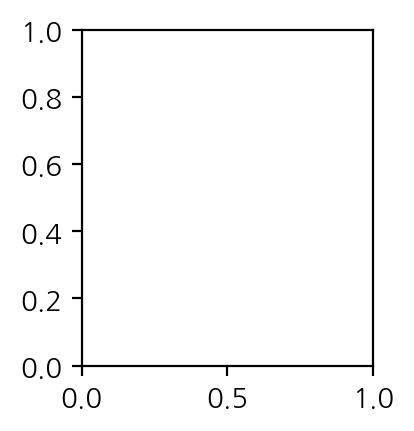

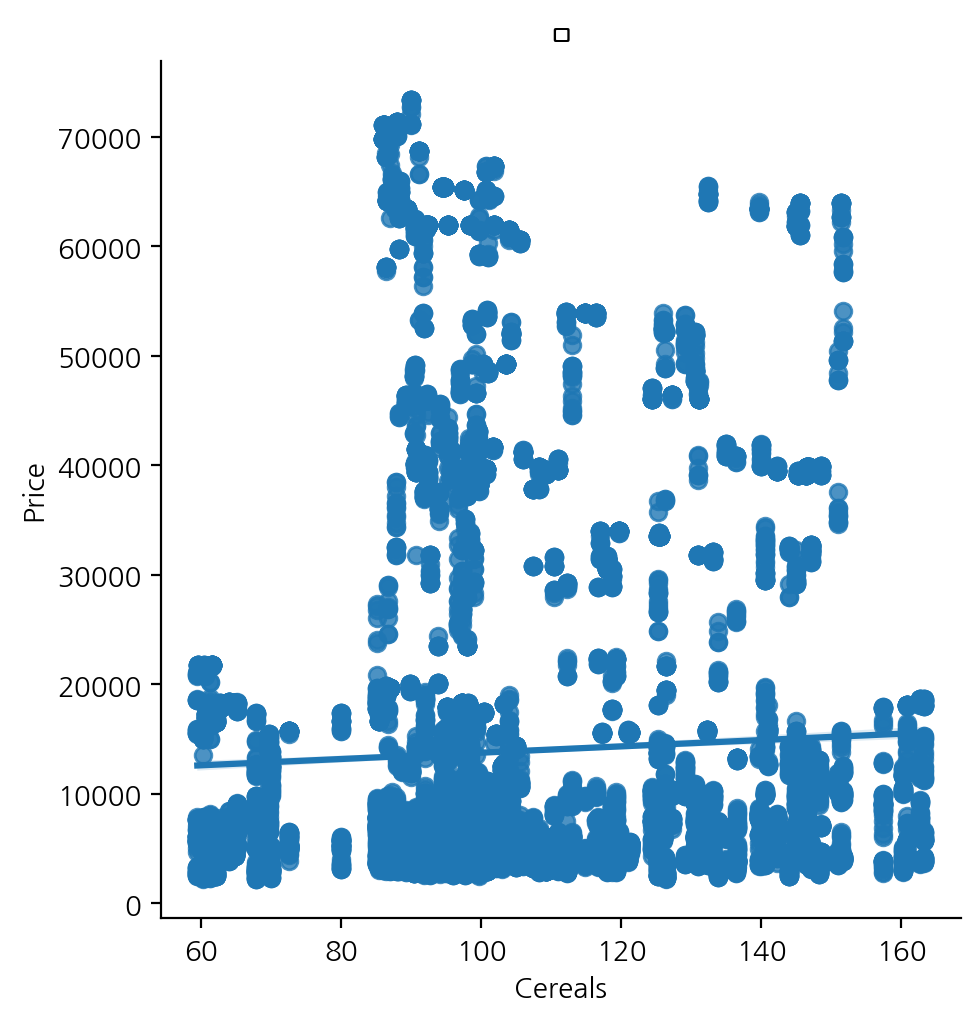

In [22]:
# sns.lmplot(data=df_raw, x="Cereals", y="Price")

plt.figure(figsize=(8, 8))
for i, x in enumerate(df_raw.columns[5:]):
    print(i)
    plt.subplot(2, 3, i + 1)

    sns.lmplot(data=df_raw, x=x, y="Price")

    plt.title(f'ㅁ')
    plt.show()

# 시각화 (연도별)

In [21]:
def AgriMarket_EDA(product:str, year:tuple) -> None:

    # input
    # product = input('품목을 입력하세요. : ')
    # start = int(input('시작 연도를 입력하세요. (4자리) : '))
    # end = int(input('끝 연도를 입력하세요. (4자리) : '))
    # print()
    start = year[0]
    end = year[1]
    
    
    if product not in product_w:
        print('해당 제품의 도매 거래내역이 없습니다.')
    
    elif ((min(df_gw[df_gw['Product']==product]['Y']) > end) | (max(df_gw[df_gw['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 도매 거래내역이 없습니다.')  
    
    else:
        df_gw[(df_gw['Product']==product) & (df_gw['Y'] >= start) & (df_gw['Y'] <= end)].groupby(['YMD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 도매가격 변동 그래프', fontsize=20)

    
    if product not in product_r:
        print('해당 제품의 소매 거래내역이 없습니다.')
    
    elif ((min(df_gr[df_gr['Product']==product]['Y']) > end) | (max(df_gr[df_gr['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 소매 거래내역이 없습니다.')
        
    else:
        df_gr[(df_gr['Product']==product) & (df_gr['Y'] >= start) & (df_gr['Y'] <= end)].groupby(['YMD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 소매가격 변동 그래프', fontsize=20)

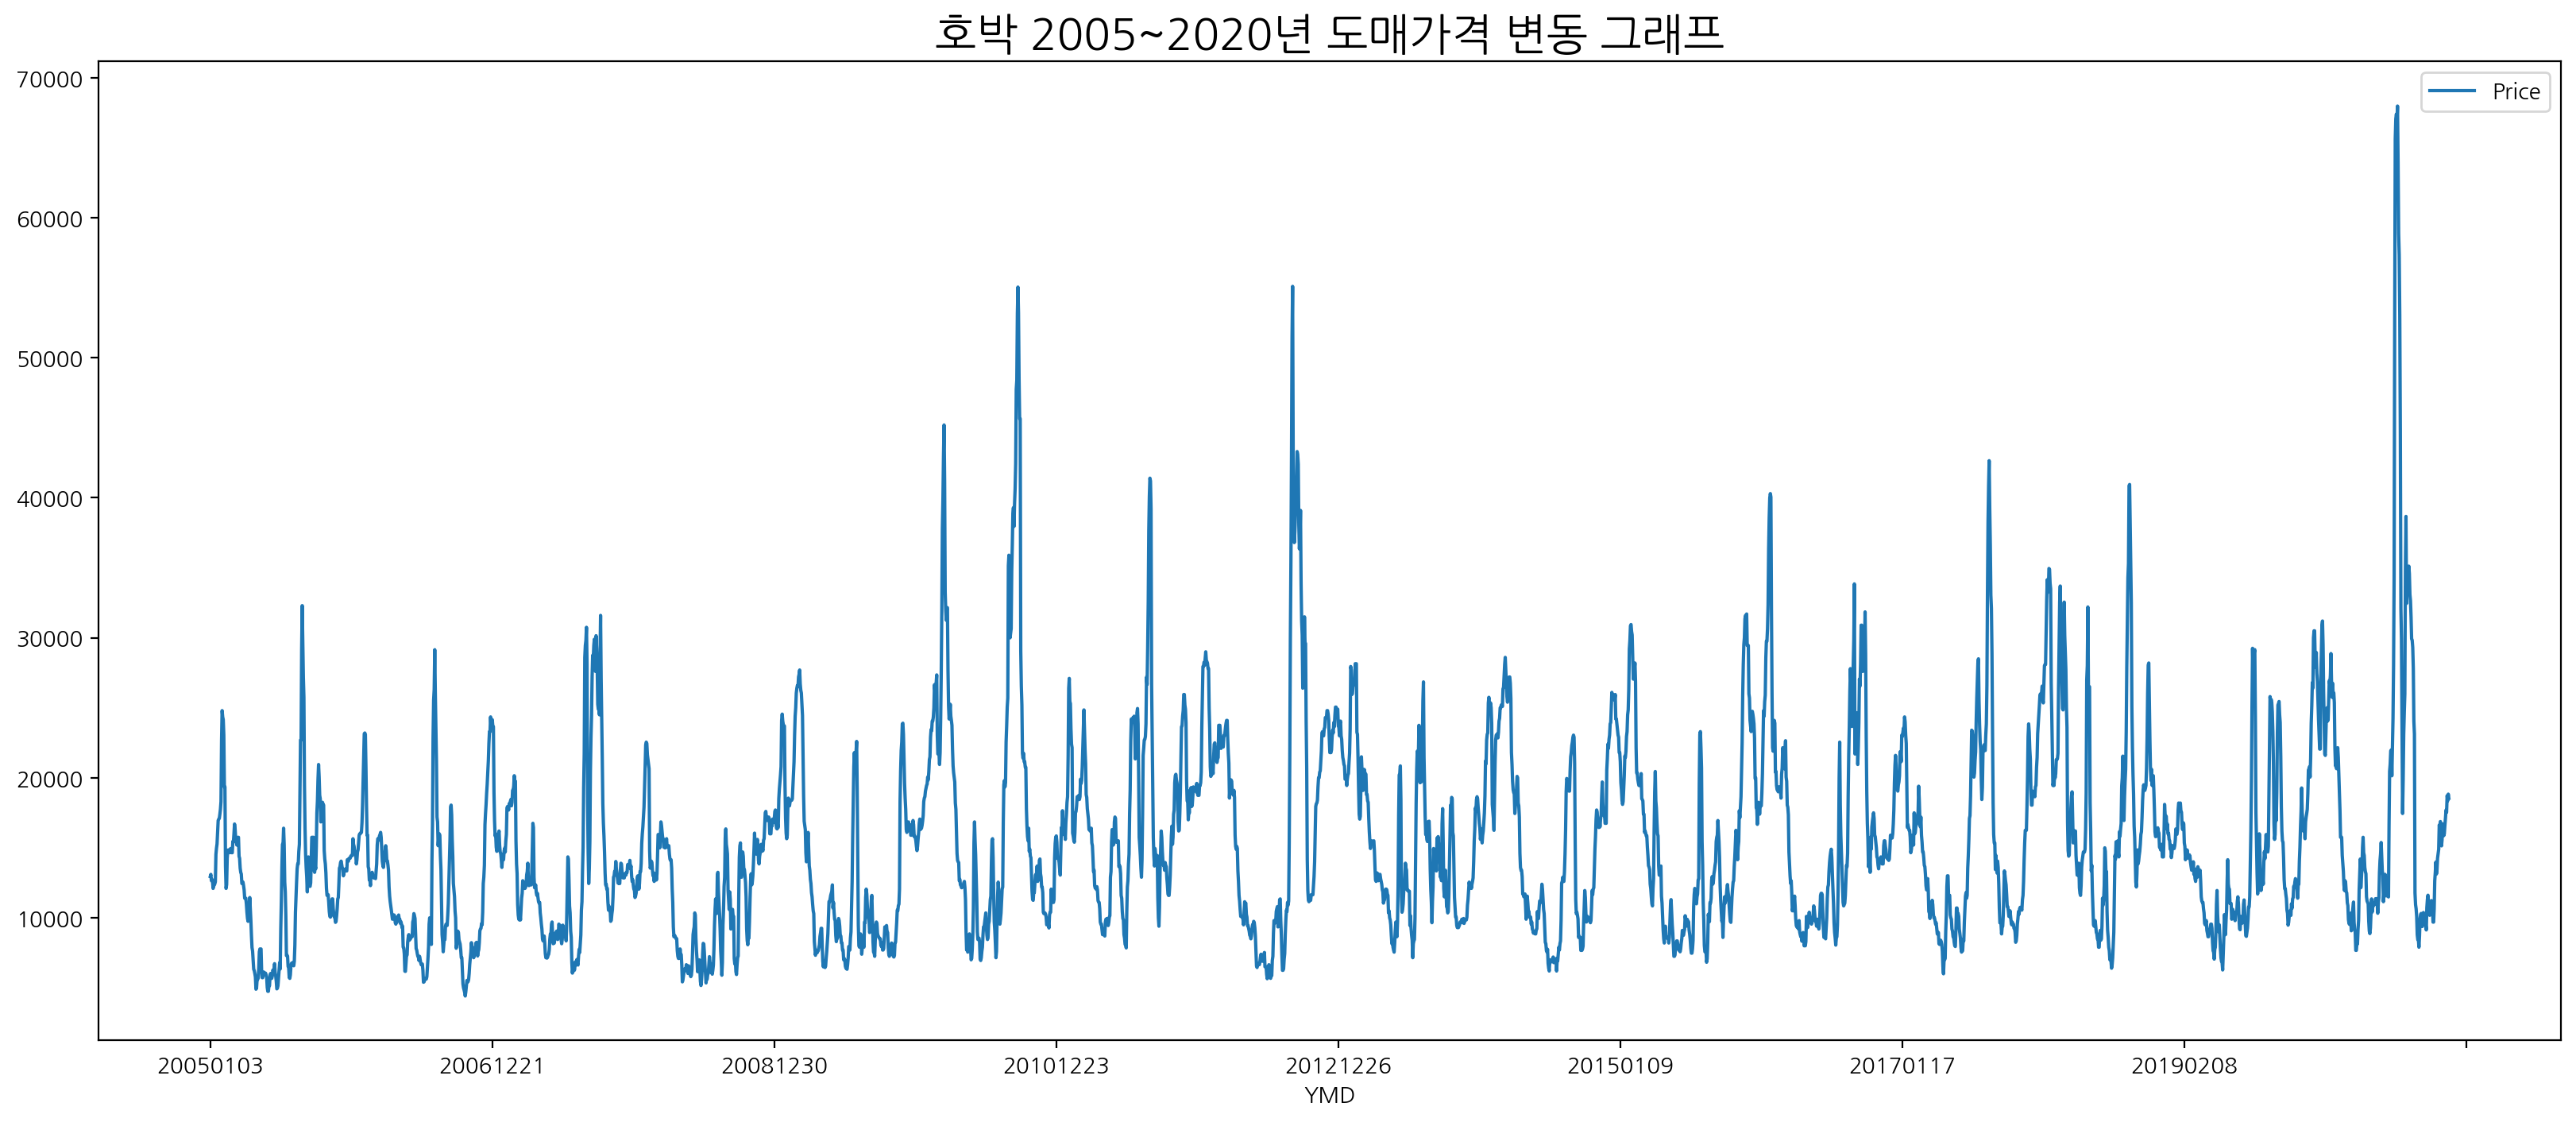

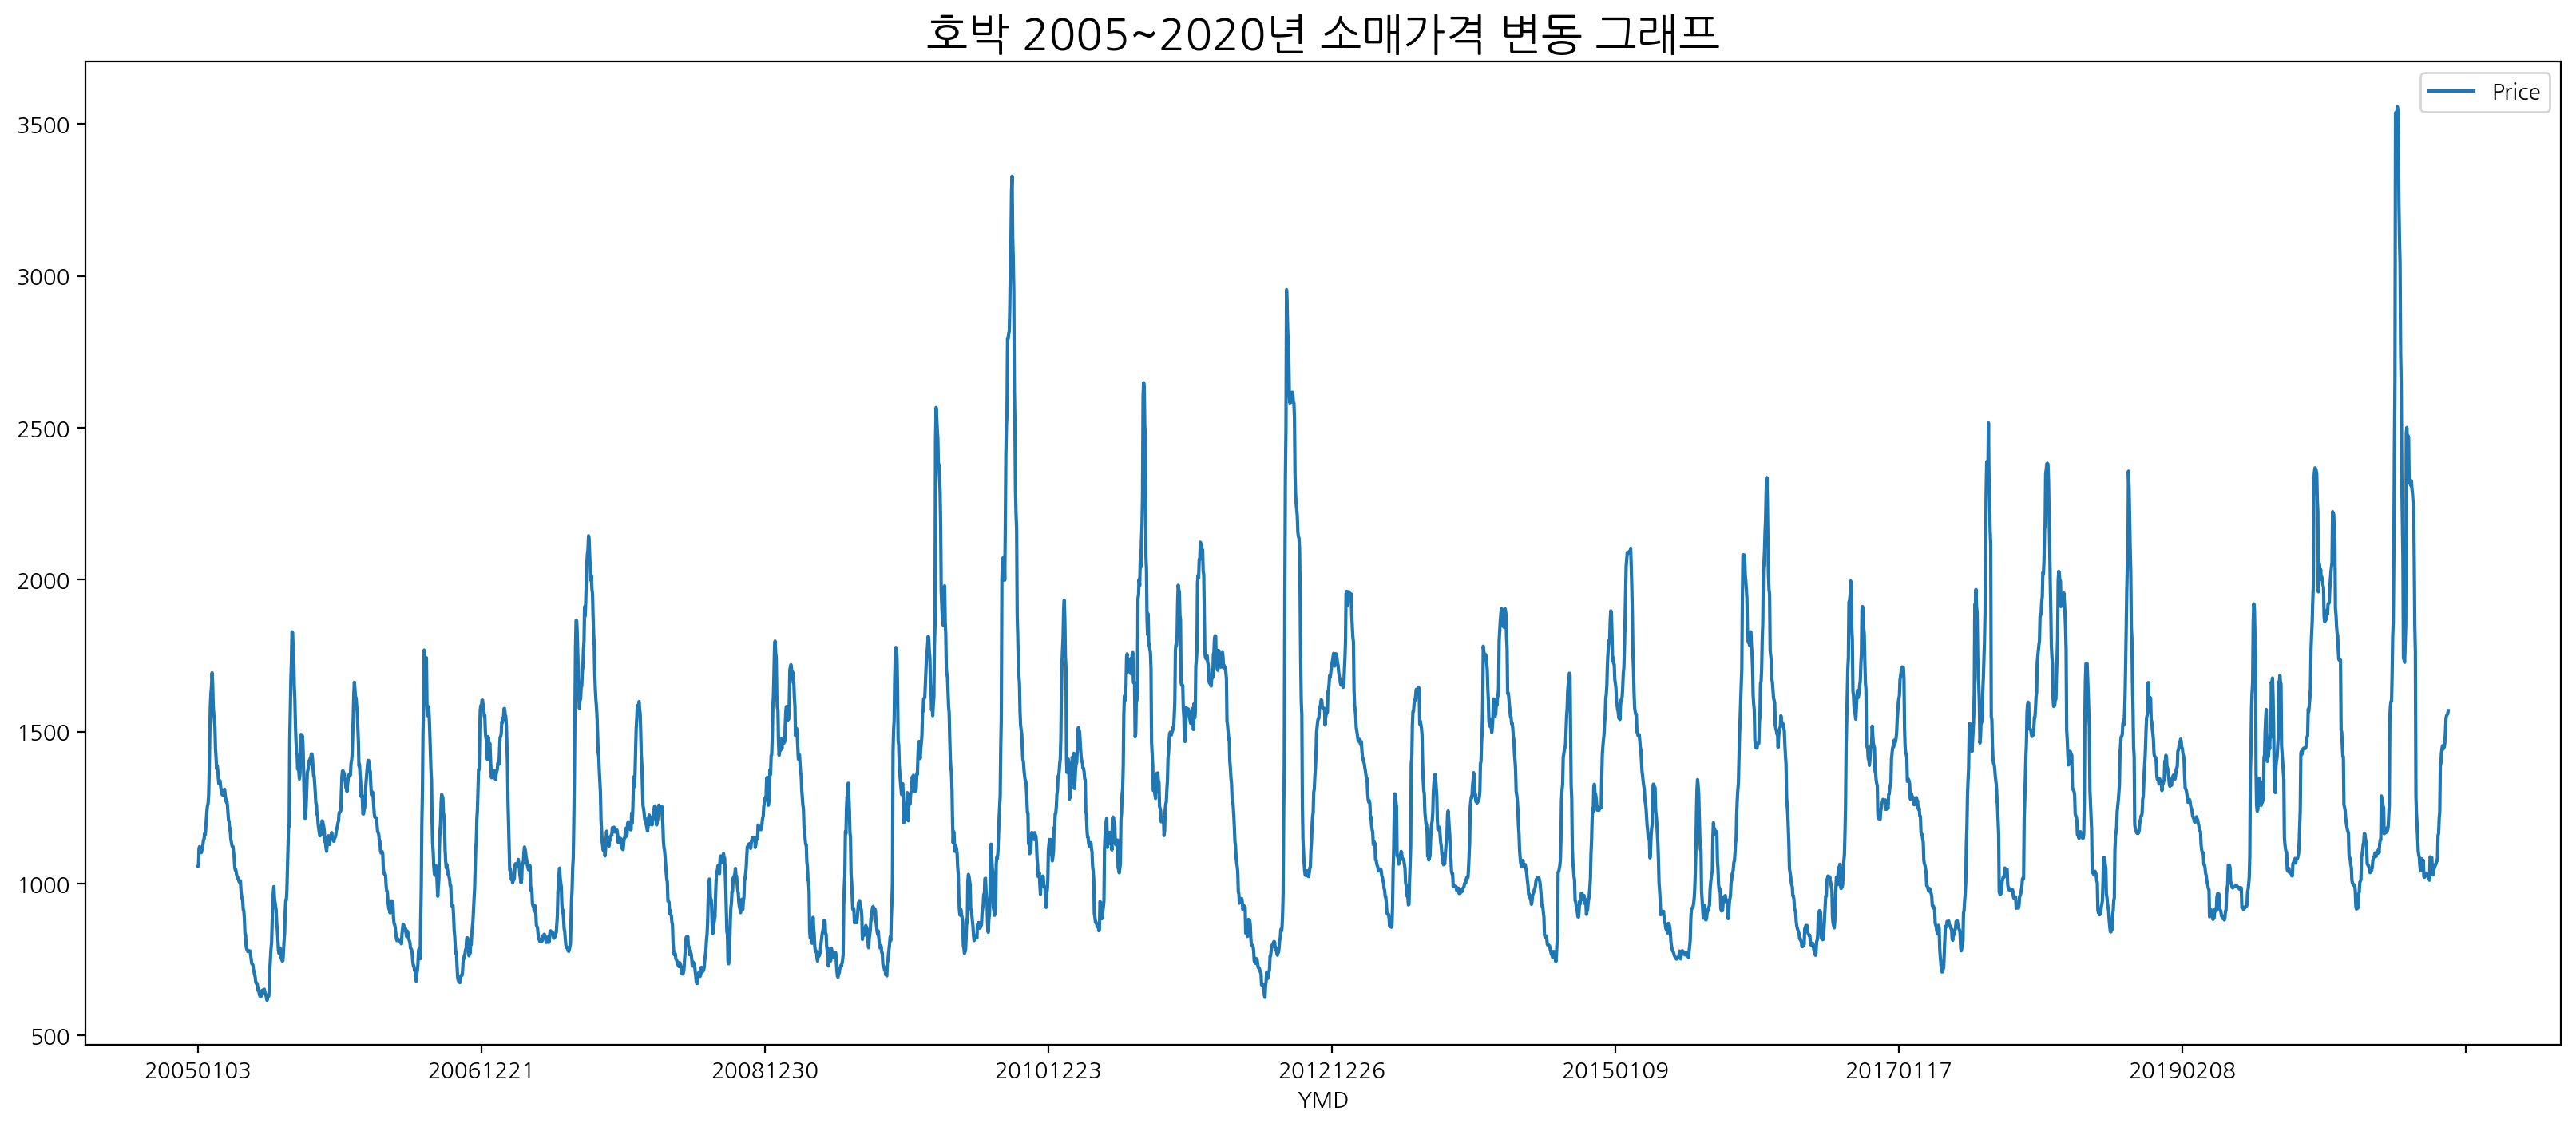

In [22]:
AgriMarket_EDA("호박", (2005, 2020))

# 시각화 (계절별)

In [25]:
def AgriMarket_viz(product:str, year:tuple) -> None:

    # input
    # product = input('품목을 입력하세요. : ')
    # start = int(input('시작 연도를 입력하세요. (4자리) : '))
    # end = int(input('끝 연도를 입력하세요. (4자리) : '))
    # print()
    start = year[0]
    end = year[1]
    
    
    if product not in product_w:
        print('해당 제품의 도매 거래내역이 없습니다.')
    
    elif ((min(df_gw[df_gw['Product']==product]['Y']) > end) | (max(df_gw[df_gw['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 도매 거래내역이 없습니다.')  
    
    else:
        df_gw[(df_gw['Product']==product) & (df_gw['Y'] >= start) & (df_gw['Y'] <= end)].groupby(['MD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 도매가격 변동 그래프', fontsize=20)

    
    if product not in product_r:
        print('해당 제품의 소매 거래내역이 없습니다.')
    
    elif ((min(df_gr[df_gr['Product']==product]['Y']) > end) | (max(df_gr[df_gr['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 소매 거래내역이 없습니다.')
        
    else:
        df_gr[(df_gr['Product']==product) & (df_gr['Y'] >= start) & (df_gr['Y'] <= end)].groupby(['MD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 소매가격 변동 그래프', fontsize=20)

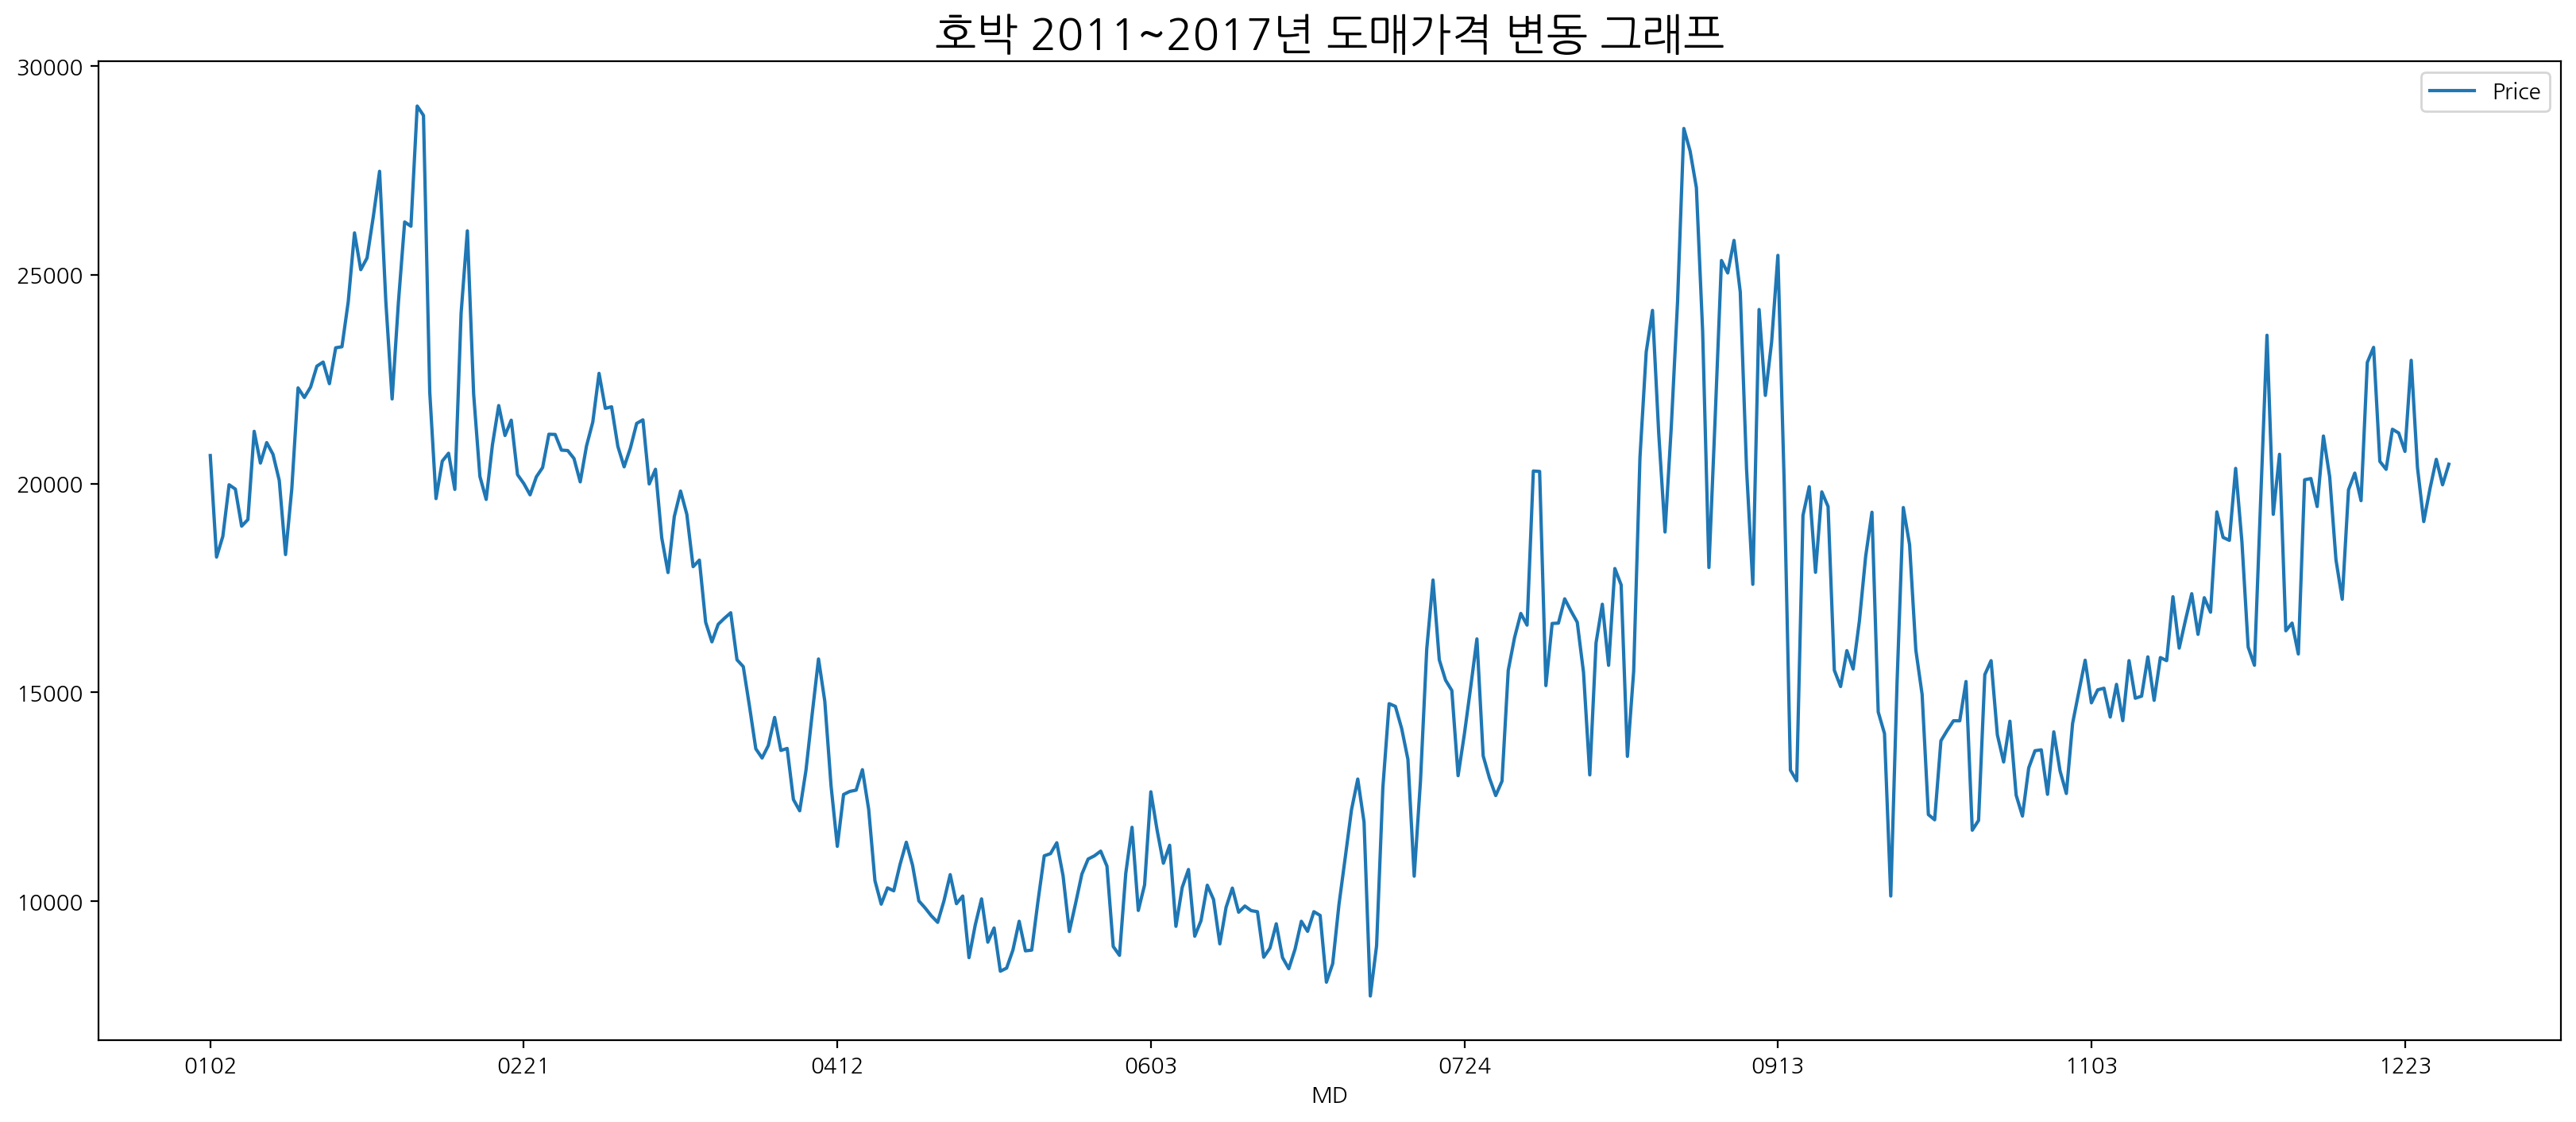

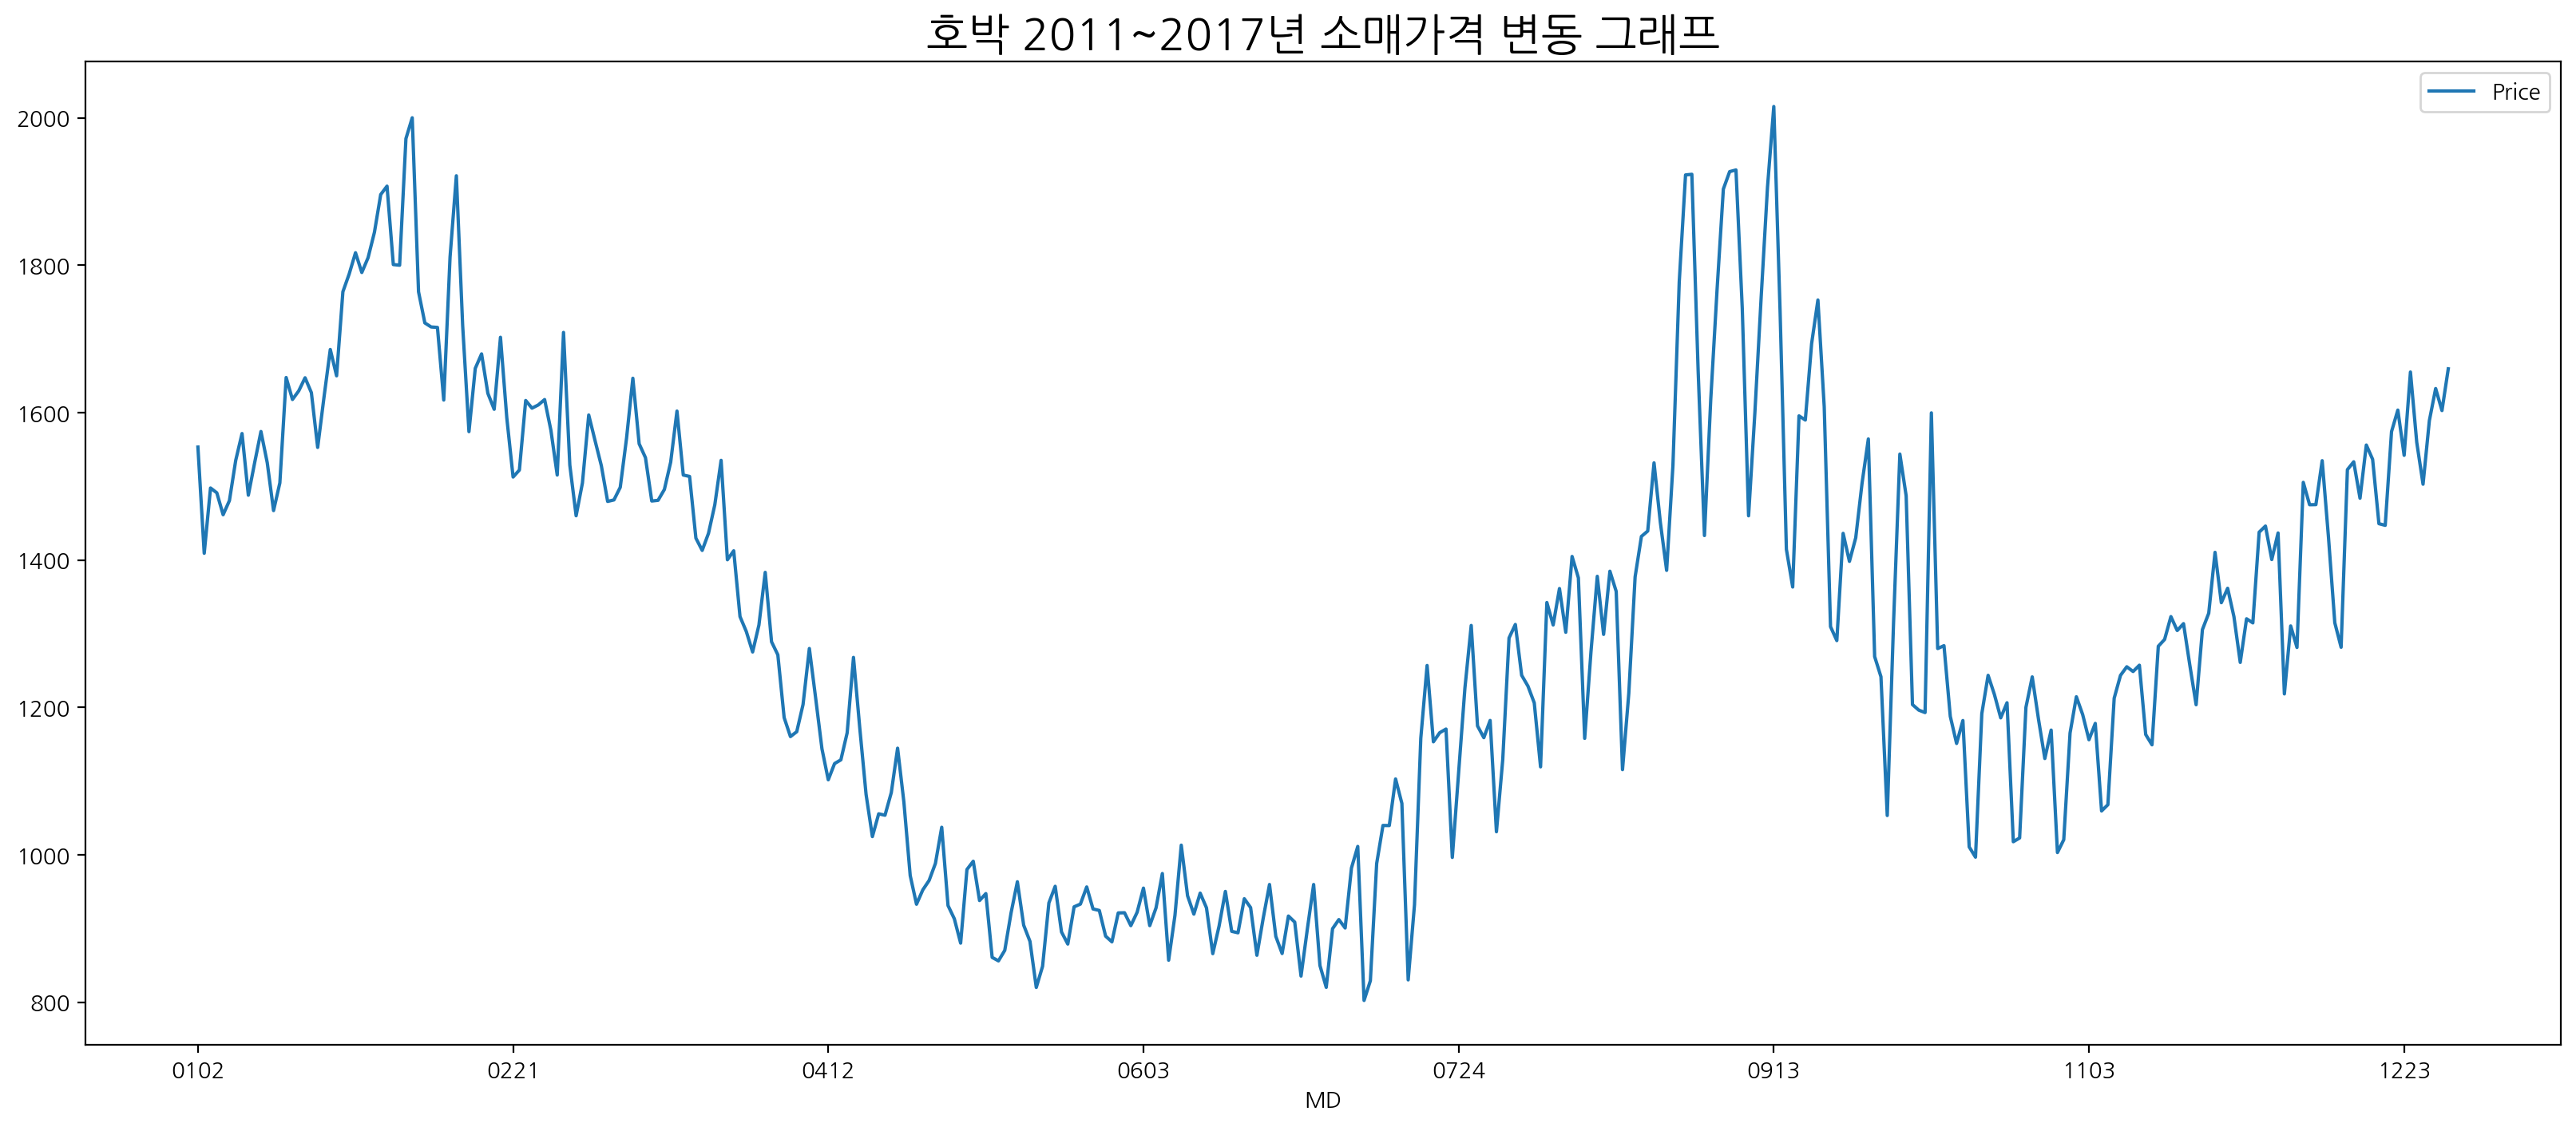

In [26]:
AgriMarket_viz("호박", (2011, 2017))

In [ ]:
1